---
# <center> **Foundations of Applied Machine Learning**
## <center> Summer 2024

### <center> **Prof. Bahram Mobasher**
### <center> Teaching Assistant: **[Sina Taamoli](https://sinataamoli.github.io/)** | email: *sina.taamoli@email.ucr.edu* | [Course webpage](https://github.com/sinataamoli/Foundations-of-Applied-Machine-Learning)
### <center> Week 3 (July 18th): Probabilistic Programming
---

# Fitting any model with Least Squared:
Here let's look at the function with few parameters:


$$
y = f(x) = \alpha x e^{\gamma x}
$$

In [14]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def f(x, α, γ):
    return α * x * exp(γ * x)

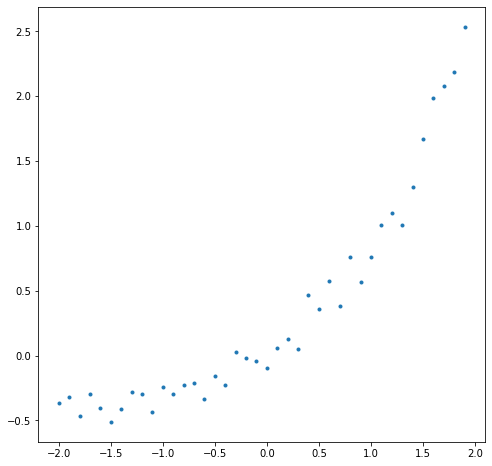

In [18]:
np.random.seed(4)

α, γ = 0.5, 0.5

x_span = [i/100 for i in range(-200, 200, 10)]
y_span = [f(i, α, γ) + 0.1 * np.random.randn()  for i in x_span]

plt.figure(figsize=(8, 8))

plt.plot(x_span, y_span, ".")

plt.show()

In [19]:
def least_squared(y_measured, y_prediction):
    ls = []
    for y0, y1 in zip(y_measured, y_prediction):
        ls.append((y0 - y1)**2)
    return sum(ls)**0.5

In [20]:
def prob(l):
    return exp(-l**2)

This is the prior for the $\alpha$, and $\gamma$, which we will choose to be uniform.

In [23]:
α_span = np.linspace(0.2, 0.8, 300)
γ_span = np.linspace(0.2, 0.9, 300)

Going through the parameters sampling to find the pair that makes the least squared function minimum. (equavalently makes the `prob` function maximum. 

In [26]:
values = []
for α in α_span:
    for γ in γ_span:
        y_prediction = [f(x, α, γ) for x in x_span]
        y_measured = y_span
        values.append((prob(least_squared(y_measured, y_prediction)), α, γ))

finding the pairs sorted with respect to their probabilities:

In [27]:
sorted(values, key=lambda x: x[0], reverse=True)[:5]

[(0.6601053140901147, 0.5090301003344482, 0.49966555183946487),
 (0.6600499054466553, 0.5070234113712375, 0.5020066889632107),
 (0.6600216832077364, 0.5110367892976588, 0.49732441471571903),
 (0.6599868649784066, 0.5090301003344482, 0.49732441471571903),
 (0.6599684206411858, 0.5070234113712375, 0.49966555183946487)]

In [28]:
A, B = sorted(values, key=lambda x: x[0], reverse=True)[0][1], sorted(values, key=lambda x: x[0], reverse=True)[0][2]

In [29]:
A, B

(0.5090301003344482, 0.49966555183946487)

## Plotting the probability density: $p(\alpha, \gamma | data)$

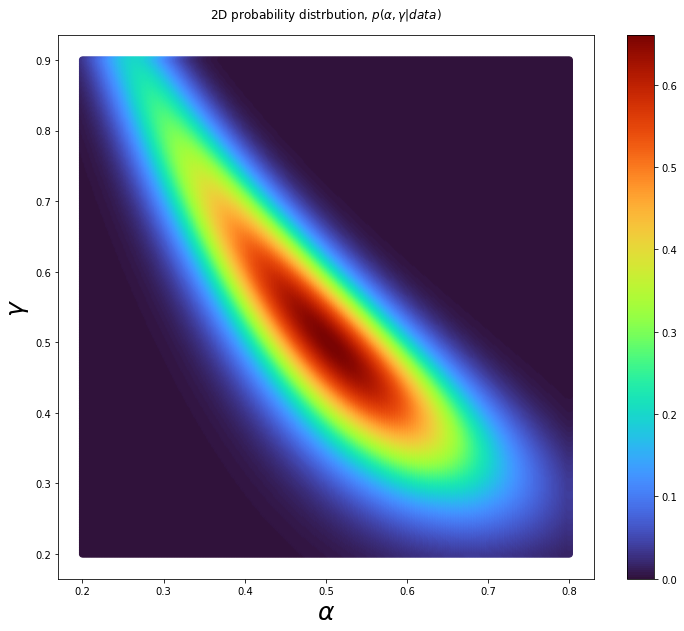

In [30]:
X = [value[1] for value in values]
Y = [value[2] for value in values]
Z = [value[0] for value in values]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title(r"2D probability distrbution, $p(\alpha, \gamma | data)$", y = 1.02)

c = ax.scatter(X, Y, c = Z, cmap="turbo")

ax.set_xlabel(r"$\alpha$", fontsize=25)
ax.set_ylabel(r"$\gamma$", fontsize=25)

plt.colorbar(c)
plt.show()

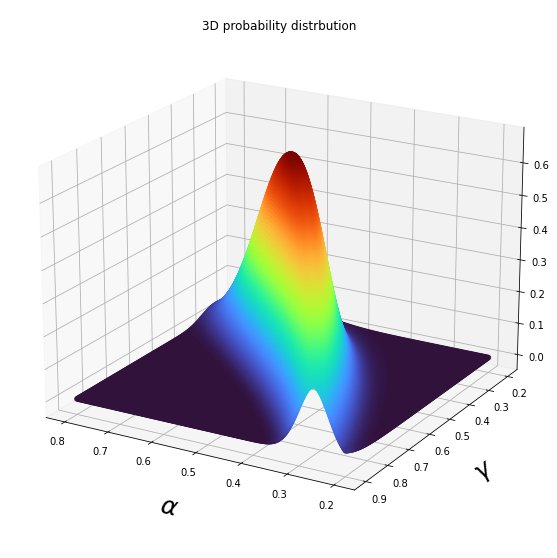

In [31]:
from mpl_toolkits import mplot3d

plt.figure(figsize=(10, 10))

ax = plt.axes(projection = '3d')
ax.view_init(azim = 120, elev = 20)

ax.scatter3D(X, Y, Z, c = Z, cmap = 'turbo')

ax.set_title(r"3D probability distrbution", y=1.03)

ax.set_xlabel(r"$\alpha$", fontsize=25, labelpad=20)
ax.set_ylabel(r"$\gamma$", fontsize=25, labelpad=20)
ax.set_zlabel(r"$P(\alpha, \gamma | data)$", fontsize=25, labelpad=20)

plt.show()

In [32]:
A, B

(0.5090301003344482, 0.49966555183946487)

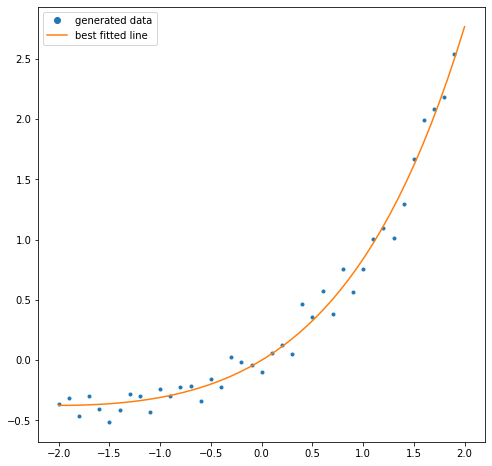

In [34]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_span, y_span, ".", label = 'generated data')

x_span1 = np.linspace(-2, 2, 50)
ax.plot(x_span1, [f(x, A, B) for x in x_span1], label = 'best fitted line')

ax.legend(markerscale=2)
plt.show()

---
# Bayesian Inference:


In [36]:
data = np.array([16, 24, 16, 12, 16, 11, 14, 15, 9, 14, 7])

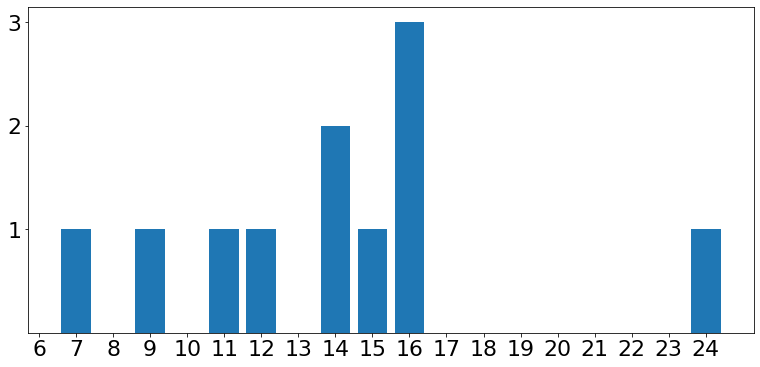

In [39]:
plt.figure(figsize=(13, 6))

labels, counts = np.unique(data, return_counts = True)
plt.bar(labels, counts, align = 'center')
plt.xticks(range(6, 25))
plt.yticks(range(1, 4))
plt.tick_params(labelsize=22);

## Poisson distribution?

$$p(k \mid \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$$

In [40]:
from math import factorial

In [41]:
@np.vectorize
def poisson(k, λ = 2):
    return λ**k * np.exp(-λ) / factorial(k)

In [42]:
ks = np.arange(0, 25)
ps = poisson(ks, 2.2)

In [43]:
ps

array([1.10803158e-01, 2.43766948e-01, 2.68143643e-01, 1.96638672e-01,
       1.08151269e-01, 4.75865586e-02, 1.74484048e-02, 5.48378437e-03,
       1.50804070e-03, 3.68632171e-04, 8.10990777e-05, 1.62198155e-05,
       2.97363285e-06, 5.03230174e-07, 7.90790274e-08, 1.15982574e-08,
       1.59476039e-09, 2.06380756e-10, 2.52243146e-11, 2.92071011e-12,
       3.21278112e-13, 3.36577070e-14, 3.36577070e-15, 3.21943284e-16,
       2.95114677e-17])

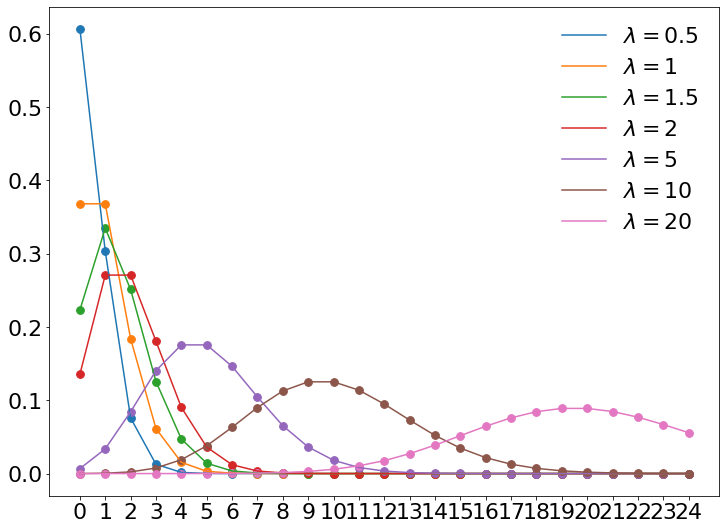

In [44]:
plt.figure(figsize=(12, 9))


for λ in [0.5, 1, 1.5, 2, 5, 10, 20]:
    ps = poisson(ks, λ)
    plt.plot(ks, ps, label=r"$\lambda = {}$".format(λ))
    plt.scatter(ks, ps, s=60)
plt.xticks(ks)
plt.legend(frameon=False, fontsize=22)
plt.tick_params(labelsize=22);

### Model:
$$
p(\lambda) = \frac{1}{\lambda_{max} - \lambda_{min}} \\
p(k \mid \lambda) = \frac{\lambda^k e^{-\lambda}}{k!} \\
$$
Using Bayes:
$$
p(\lambda | \text{data}) \propto p(\text{data} \mid \lambda) p(\lambda)  \\
p(\text{data} \mid \lambda) = \prod_{k}p(k \mid \lambda)\\
\ln(p(\lambda | \text{data})) \propto \ln(p(\lambda)) + \sum_k \ln(p(k \mid \lambda))
$$

In [45]:
@np.vectorize
def ln_prior(λ, MIN, MAX):
    p = 1 / (MAX - MIN)
    
    if MIN <= λ <= MAX:
        return np.log(p)
    else:
        return -np.inf

In [46]:
def ln_likelihood(ks, λ):
    return np.sum(np.log(poisson(ks, λ)))

In [47]:
MIN, MAX = 0.001, 100
λ_span = np.linspace(MIN, MAX, 3000)

In [48]:
Π_min, Π_max = 5, 20

ln_posterior = []
ln_likelihoods = []

for λ in λ_span:
    ln_posterior += [ln_prior(λ, Π_min, Π_max) + ln_likelihood(data, λ)]
    ln_likelihoods += [ln_likelihood(data, λ)]
    
ln_posterior = np.array(ln_posterior)
ln_likelihoods = np.array(ln_likelihoods)

In [50]:
from scipy.integrate import trapz

In [51]:
posterior_probability = np.exp(ln_posterior) / trapz(np.exp(ln_posterior), λ_span)

likelihoods = (np.exp(ln_likelihoods)/np.exp(ln_likelihoods).max()) * max(posterior_probability) 

prior = np.exp(ln_prior(λ_span, Π_min, Π_max))

In [52]:
MAP_estimate = float(λ_span[posterior_probability == posterior_probability.max()])

In [53]:
MAP_estimate, data.mean()

(14.005528176058684, 14.0)

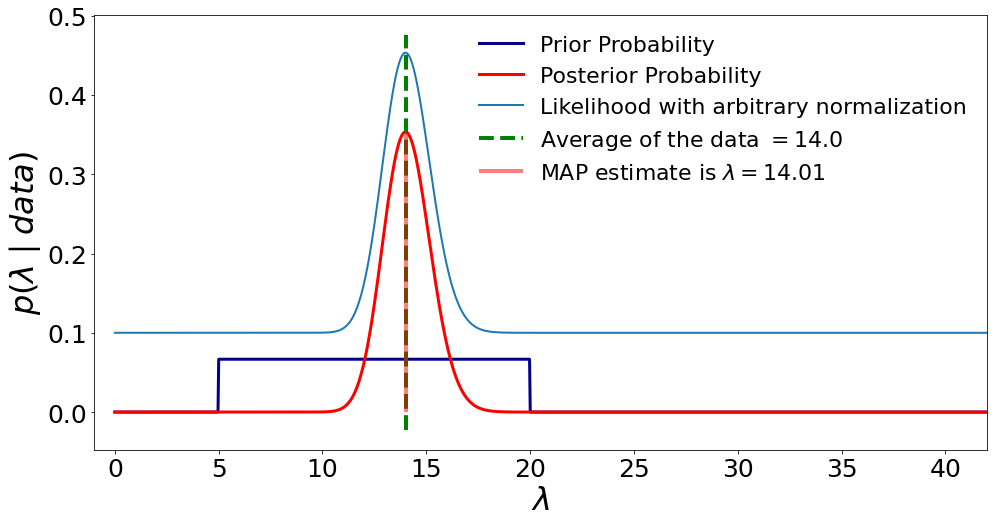

In [55]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(λ_span, prior, label="Prior Probability", color="darkblue", lw=3)
ax.plot(λ_span, posterior_probability, label="Posterior Probability", color="r", lw=3)

ax.plot(λ_span, likelihoods + 0.1, label="Likelihood with arbitrary normalization", lw=2)


ax.vlines(data.mean(), *plt.gca().get_ylim(), label=r"Average of the data $={}$".format(round(data.mean(), 2)), color="g", ls="--", lw=4)

ax.vlines(MAP_estimate, 0, posterior_probability.max(), label=r"MAP estimate is $\lambda = {}$".format(round(MAP_estimate, 2)), color="r", lw=4, alpha=0.5)

ax.tick_params(labelsize=25)

ax.set_xlabel(r"$\lambda$", fontsize=32)
ax.set_ylabel(r"$p(\lambda \mid data)$", fontsize=32)

ax.set_xlim(-1, 42)

ax.legend(fontsize=22, frameon=False, loc="upper right");

# **Flip A Coin: Is this Coin Really Fair?**

## Imagine that you want to measure the fairness of a given coin:
### You run the following experiment:
1. You count the number of heads per $N=20$ coin toss.
2. You do the previous line 100 times.

And this is the outcome of the experiment:

In [56]:
data_array = [ 6,  7,  8, 11,  8,  7,  8,  9,  8,  5, 12,  7,  5,  8,  8,  8, 10,
               9,  9,  7,  5, 11,  6,  2,  9,  8, 11,  8, 10,  5,  9, 11,  8,  9,
               7,  8,  6,  8, 12,  9, 11,  9,  6,  7, 11,  5,  9,  6,  8, 12,  6,
               8,  7,  8,  8, 11,  5,  6,  6,  7, 12,  9,  7,  8,  9,  7, 11,  7,
               9,  4,  8,  9,  9,  9, 12,  6,  8,  7, 10,  6,  5,  8,  9,  7,  8,
               7,  9,  7,  7, 12,  9, 11,  6,  5,  9,  7,  9,  7, 11,  8]

First, we need to come up with a model for the data. We need to find the probability of each outcome first, before getting into the estimation for fairness. Let's ask a simple question: **What are the possible results of a coin toss?** 

_The answer is:_ (Head, tail) or (0,1) or (True, False) or (win, lose)

So, if we assume that the probability of getting 1 is $p$ and $p$ is not going to change throughout the experiment. Also, by definition, the probability of getting 0 is $q=1-p$. ($p$ is a quantity we are looking for since it is a measure for the fairness of the coin)

Let's say that we are going to toss the coins $N$ times and we get $n$ desired outcome. (e.g., **Head** is the desired outcome)


But, what are the chances of getting $n$ out of $N$ coin tosses? 

$n$ desired outcome probability is $p^n$; also we have $N-n$ undesired outcome during the experiment which means that the total probability of getting $n$ 1s and $N-n$ 0s is $p^n q^{N-n}$

Also, we do not care about the **order** of the coin toss. (e.g. (1,0,0,0,1), (0,1,1,0,0), (1,1, 0, 0, 0) all are considered same outcome)
So, we need to multiply the previous probability by number of configurations. (Number of ways you can choose $n$ ones, and $N-n$ zeros; which is:  $\binom {N}{n}$

So the probability of the $n$ heads out of $N$ coin toss, when the probability of single **head** is $p$, is the following: 

\begin{equation}
p(n|N,p)=\binom {N}{n} p^n (1-p)^{N-n} 
\end{equation}

Which is called the [**binomial distribution**](https://en.wikipedia.org/wiki/Binomial_distribution).

There is a pre-defined [binomial function in scipy](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html) package. However, since we are still trying to get familiar with python, let's write the function ourself as below:


In [57]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [58]:
def binomial(n=0, N=1, p=1):
    from math import factorial
    factor = factorial(N)/ (factorial(n) * factorial(N-n))
    return factor * (p**n) * (1-p)**(N-n)

### Now we need to make some assumption about prior distribution of $p$ which is the quantity of the interest.

Since we have no other information about the coin before-hand we can assume a **Uniform** prior for $p$. So, let's sample from $10^5$ values for $p$ from this uniform distribution.

In [59]:
number_of_points = 10**5
prior_p = np.linspace(0, 1, number_of_points)

Importing time() for getting a benchmark for different methods:

In [61]:
from time import time

### **A simple for loop:**

In the following cell, we are going to calculate the probability of getting all the values in the data-set, while using different $p$. Since, we can assume that the experiments are independent, we can simply multiply all the probabilities. Then looking for the $p$ value which maximize that probability; or in other words, is the most likely value for $p$ given our data-set. 

You should notice that we are using the **Bayes' law** again; we are looking for $P(p|X)$ in which $X$ is the whole data-set. But, we can turn that around and look for much simpler quantity, using Bayes' law: $P(p|X) \sim P(X|p)$

In [62]:
N = 20

prob_p_cat = np.zeros(number_of_points)
ti = time()

for i, p in enumerate(prior_p):
    prob = 1
    for data in data_array:
        prob *= binomial(data, N, p)
        
    prob_p_cat[i] = prob
tf = time()-ti

print("For loop method for {} data points and {} simulations \
(sampling p) takes: {:10.3f} seconds ".format(len(data_array), \
                                              number_of_points, tf))

For loop method for 100 data points and 100000 simulations (sampling p) takes:     15.327 seconds 


This is the most likely value according to the description above.

In [65]:
prior_p[prob_p_cat==max(prob_p_cat)]

array([0.40300403])